<a href="https://colab.research.google.com/github/SMITamim/Churn-Prediction-Tours-travel/blob/main/T%26T.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle


In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"syedtamim","key":"2cf9d332064a6727dc37b9b7885c2542"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                           title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ---------------------------------------------  ----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                         Spotify and Youtube                             9MB  2023-03-20 15:43:25           1109         40  1.0              
dgoenrique/netflix-movies-and-tv-shows                        Netflix Movies and TV Shows                     2MB  2023-03-13 18:49:00            800         27  1.0              
rajkumarpandey02/list-of-countries-by-gdp-sector-composition  List of Countries by GDP Sector Composition     8KB  2023-03-20 04:42:10           1008         35  1.0              
datascientistanna/customers-dataset                           Shop Customer Data                    

In [ ]:
!kaggle datasets download -d tejashvi14/tour-travels-customer-churn-prediction


  0% 0.00/3.45k [00:00<?, ?B/s]
100% 3.45k/3.45k [00:00<00:00, 6.57MB/s]


In [ ]:
!unzip tour-travels-customer-churn-prediction.zip

Archive:  tour-travels-customer-churn-prediction.zip
  inflating: Customertravel.csv      


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates as plc
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import column_or_1d
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


In [ ]:
customer_dt = pd.read_csv('Customertravel.csv')

In [ ]:
print(customer_dt)

     Age FrequentFlyer AnnualIncomeClass  ServicesOpted  \
0     34            No     Middle Income              6   
1     34           Yes        Low Income              5   
2     37            No     Middle Income              3   
3     30            No     Middle Income              2   
4     30            No        Low Income              1   
..   ...           ...               ...            ...   
949   31           Yes        Low Income              1   
950   30            No     Middle Income              5   
951   37            No     Middle Income              4   
952   30            No        Low Income              1   
953   31           Yes       High Income              1   

    AccountSyncedToSocialMedia BookedHotelOrNot  Target  
0                           No              Yes       0  
1                          Yes               No       1  
2                          Yes               No       0  
3                           No               No       0  
4

In [ ]:
print(customer_dt.head())

   Age FrequentFlyer AnnualIncomeClass  ServicesOpted  \
0   34            No     Middle Income              6   
1   34           Yes        Low Income              5   
2   37            No     Middle Income              3   
3   30            No     Middle Income              2   
4   30            No        Low Income              1   

  AccountSyncedToSocialMedia BookedHotelOrNot  Target  
0                         No              Yes       0  
1                        Yes               No       1  
2                        Yes               No       0  
3                         No               No       0  
4                         No               No       0  


In [ ]:
print(customer_dt.describe())

              Age  ServicesOpted      Target
count  954.000000     954.000000  954.000000
mean    32.109015       2.437107    0.234801
std      3.337388       1.606233    0.424097
min     27.000000       1.000000    0.000000
25%     30.000000       1.000000    0.000000
50%     31.000000       2.000000    0.000000
75%     35.000000       4.000000    0.000000
max     38.000000       6.000000    1.000000


In [ ]:
print(customer_dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB
None


In [ ]:
customer_dt.drop_duplicates(inplace=True)

In [ ]:
print(customer_dt['Age'].value_counts())

30    70
34    51
37    45
31    42
29    42
28    40
27    36
36    36
35    34
33    26
38    25
Name: Age, dtype: int64


In [ ]:
print(customer_dt['FrequentFlyer'].value_counts())

No           250
Yes          144
No Record     53
Name: FrequentFlyer, dtype: int64


In [ ]:
print(customer_dt['AnnualIncomeClass'].value_counts())

Low Income       205
Middle Income    173
High Income       69
Name: AnnualIncomeClass, dtype: int64


In [ ]:
print(customer_dt['ServicesOpted'].value_counts())

1    150
4     80
2     71
3     63
5     55
6     28
Name: ServicesOpted, dtype: int64


In [ ]:
print(customer_dt['AccountSyncedToSocialMedia'].value_counts())

No     261
Yes    186
Name: AccountSyncedToSocialMedia, dtype: int64


In [ ]:
print(customer_dt['BookedHotelOrNot'].value_counts())

No     258
Yes    189
Name: BookedHotelOrNot, dtype: int64


In [ ]:
print(customer_dt['Target'].value_counts())

0    325
1    122
Name: Target, dtype: int64


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Age', ylabel='Target'>

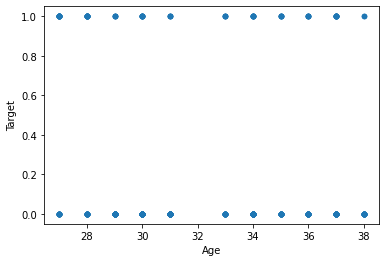

In [ ]:
customer_dt.plot(kind='scatter', x='Age', y='Target')

<Axes: xlabel='Age', ylabel='Target'>

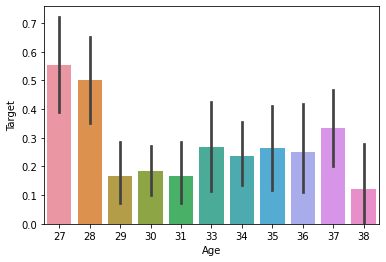

In [ ]:
sns.barplot(x='Age', y='Target', data=customer_dt)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='FrequentFlyer', ylabel='Target'>

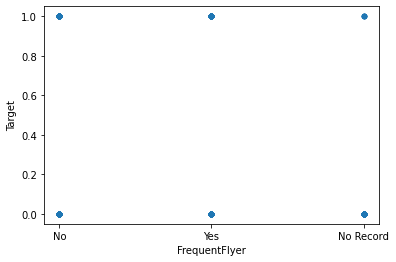

In [ ]:
customer_dt.plot(kind='scatter', x='FrequentFlyer', y='Target')

<Axes: xlabel='FrequentFlyer', ylabel='Target'>

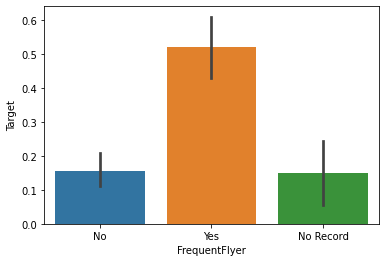

In [ ]:
sns.barplot(x='FrequentFlyer', y='Target', data=customer_dt)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='AnnualIncomeClass', ylabel='Target'>

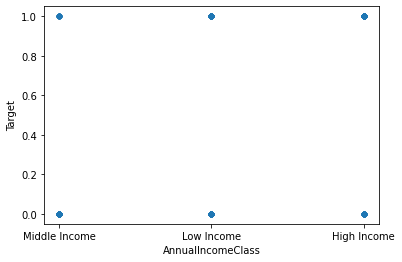

In [ ]:
customer_dt.plot(kind='scatter', x='AnnualIncomeClass', y='Target')

<Axes: xlabel='AnnualIncomeClass', ylabel='Target'>

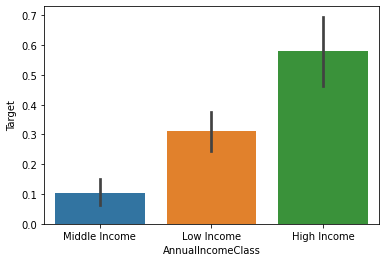

In [ ]:
sns.barplot(x='AnnualIncomeClass', y='Target', data=customer_dt)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='ServicesOpted', ylabel='Target'>

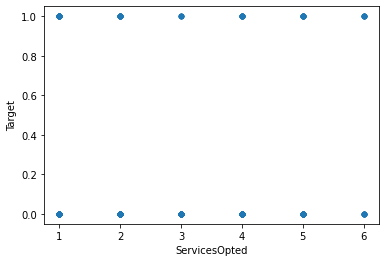

In [ ]:
customer_dt.plot(kind='scatter', x='ServicesOpted', y='Target')

<Axes: xlabel='ServicesOpted', ylabel='Target'>

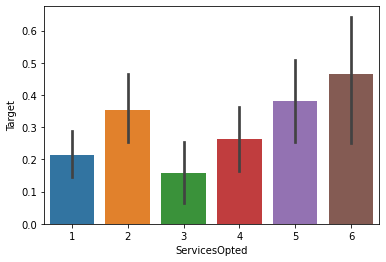

In [ ]:
sns.barplot(x='ServicesOpted', y='Target', data=customer_dt)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='AccountSyncedToSocialMedia', ylabel='Target'>

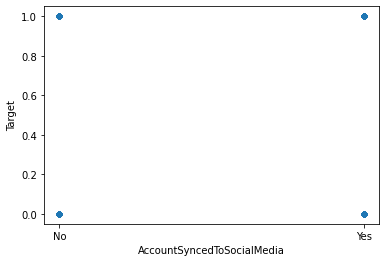

In [ ]:
customer_dt.plot(kind='scatter', x='AccountSyncedToSocialMedia', y='Target')

<Axes: xlabel='AccountSyncedToSocialMedia', ylabel='Target'>

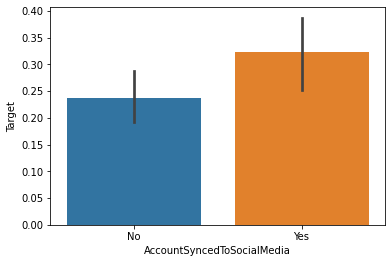

In [ ]:
sns.barplot(x='AccountSyncedToSocialMedia', y='Target', data=customer_dt)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='BookedHotelOrNot', ylabel='Target'>

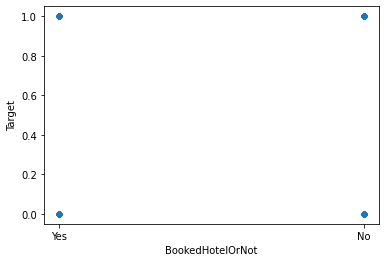

In [ ]:
customer_dt.plot(kind='scatter', x='BookedHotelOrNot', y='Target')

<Axes: xlabel='BookedHotelOrNot', ylabel='Target'>

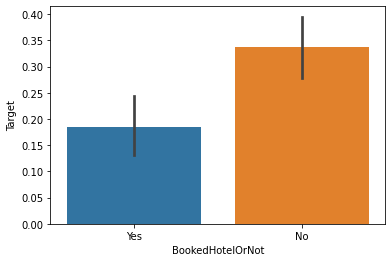

In [ ]:
sns.barplot(x='BookedHotelOrNot', y='Target', data=customer_dt)

In [ ]:
customer_dt_new = customer_dt.drop(['AccountSyncedToSocialMedia'], axis=1)

In [ ]:
print(customer_dt_new.keys())

Index(['Age', 'FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted',
       'BookedHotelOrNot', 'Target'],
      dtype='object')


<Axes: xlabel='Age'>

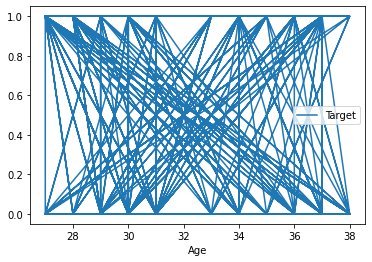

In [ ]:
customer_dt.plot(x='Age', y='Target')

<Axes: xlabel='FrequentFlyer'>

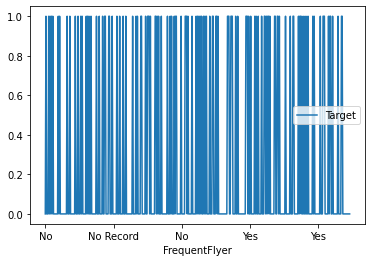

In [ ]:
customer_dt.plot(x='FrequentFlyer', y='Target')

<Axes: xlabel='AnnualIncomeClass'>

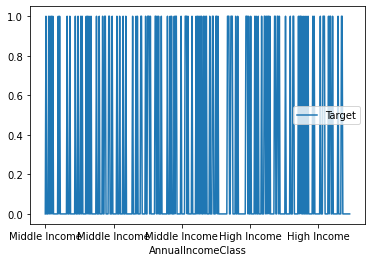

In [ ]:
customer_dt.plot(x='AnnualIncomeClass', y='Target')

<Axes: xlabel='ServicesOpted'>

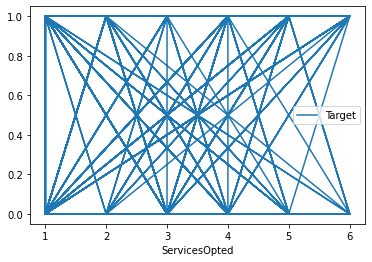

In [ ]:
customer_dt.plot(x='ServicesOpted', y='Target')

<Axes: xlabel='AccountSyncedToSocialMedia'>

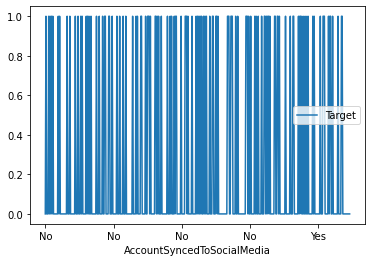

In [ ]:
customer_dt.plot(x='AccountSyncedToSocialMedia', y='Target')

<Axes: xlabel='BookedHotelOrNot'>

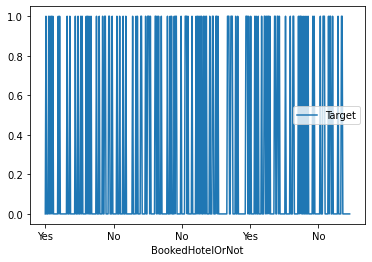

In [ ]:
customer_dt.plot(x='BookedHotelOrNot', y='Target')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f61f344d1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f61f344de80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f61f34780d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f61f35924f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f61f3592850>],
 'means': []}

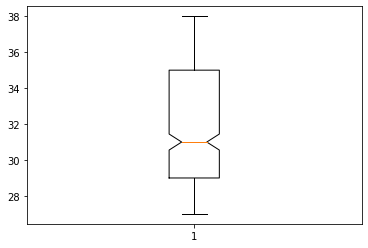

In [ ]:
plt.boxplot(customer_dt['Age'],['Target'])

In [ ]:
print(customer_dt_new.isnull().sum())

Age                  0
FrequentFlyer        0
AnnualIncomeClass    0
ServicesOpted        0
BookedHotelOrNot     0
Target               0
dtype: int64


Axes(0.125,0.125;0.62x0.755)


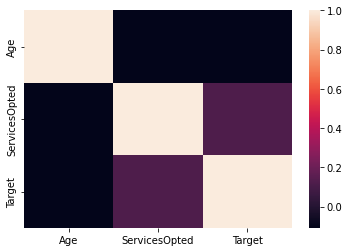

In [ ]:
print(sns.heatmap(customer_dt_new.corr()))

In [ ]:
plt.show()

<Axes: xlabel='Age', ylabel='Target'>

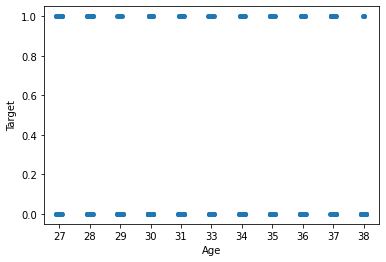

In [ ]:
sns.stripplot(x='Age', y='Target', data=customer_dt_new)

In [ ]:
customer_dt_new = customer_dt_new[customer_dt_new.iloc[:, 1] != 'No Record']

In [ ]:
customer_dt_new['FrequentFlyer'] = customer_dt_new['FrequentFlyer'].replace(['Yes', 'No'], [1, 0])

In [ ]:
customer_dt_new['AnnualIncomeClass'] = customer_dt_new['AnnualIncomeClass'].replace(['Middle Income', 'Low Income', 'High Income'], [1, 0, 2])

In [ ]:
customer_dt_new['BookedHotelOrNot'] = customer_dt_new['BookedHotelOrNot'].replace(['Yes', 'No'], [1, 0])

In [ ]:
x = customer_dt_new[['Age', 'FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted', 'BookedHotelOrNot']]

In [ ]:
y = customer_dt_new[['Target']]

In [603]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=None)

In [524]:
x_train.shape


(315, 5)

In [525]:
x_test.shape

(79, 5)

In [526]:
y_train.shape

(315,)

In [527]:
y_test.shape

(79,)

In [528]:
x

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,BookedHotelOrNot
0,34,0,1,6,1
1,34,1,0,5,0
2,37,0,1,3,0
3,30,0,1,2,0
4,30,0,0,1,0
...,...,...,...,...,...
927,36,0,1,2,0
928,28,0,0,1,1
932,29,0,0,3,0
940,27,0,0,1,1


In [529]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_svm = LogisticRegression(max_iter=1000)

In [ ]:

model_svm.fit(x_train, y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [ ]:
y_prediction_svm = model_svm.predict(x_test)

In [ ]:
y = column_or_1d(y, warn=True)

<ipython-input-148-5dd5a24b6538>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)

In [ ]:
print('Accuracy: {}'.format(score_svm))

Accuracy: 0.7152


In [ ]:
classifier_score_list = set()

In [ ]:
classifier_score_list.add(('SVM', score_svm))

In [ ]:
classifier_score_list

{('SVM', 0.7152)}

In [531]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Initialize k-NN model
model_knn = KNeighborsClassifier(n_neighbors=3)

# Train the k-NN model
model_knn.fit(x_train, y_train)

# Make predictions using the k-NN model
y_prediction_knn = model_knn.predict(x_test)

# Calculate accuracy
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)

print('Accuracy: {}'.format(score_knn))


Accuracy: 0.6582


In [533]:
model_decision_tree = DecisionTreeClassifier(random_state=4)

model_decision_tree.fit(x_train, y_train)
y_prediction = model_decision_tree.predict(x_test)

score_decision_tree = metrics.accuracy_score(y_prediction, y_test).round(4)

print('----------Decision Tree-----------')
print('Accuracy: {}'.format(score_decision_tree))
print('---------------------')

classifier_score_list.add(('DT', score_decision_tree))


----------Decision Tree-----------
Accuracy: 0.7215
---------------------


In [535]:
model_svm = svm.LinearSVC()

model_svm.fit(x_train, y_train)

y_prediction_svm = model_svm.predict(x_test)
y = column_or_1d(y, warn=True)

score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)

print('----------Support Vector Machine(SVM)-----------')
print('Accuracy: {}'.format(score_svm))
print('---------------------')

classifier_score_list = set()
classifier_score_list.add(('SVM', score_svm))

----------Support Vector Machine(SVM)-----------
Accuracy: 0.6709
---------------------


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [537]:
from sklearn.ensemble import VotingClassifier
model_knn = KNeighborsClassifier(n_neighbors=3)
model_dt = DecisionTreeClassifier(random_state=42)

# Create an ensemble model with k-NN and Decision Tree using VotingClassifier
ensemble_model = VotingClassifier(estimators=[('knn', model_knn), ('dt', model_dt)], voting='hard')

# Train the ensemble model
ensemble_model.fit(x_train, y_train)

# Make predictions using the ensemble model
y_pred = ensemble_model.predict(x_test)

# Calculate accuracy for the ensemble model
score = metrics.accuracy_score(y_pred, y_test).round(4)
print('Ensemble model accuracy: {}'.format(score))

Ensemble model accuracy: 0.7215


In [548]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model_0 = Sequential([
    Dense(64, activation='tanh', input_shape=(5,), kernel_regularizer=l1_l2(l1=0.01, l2=0.01), kernel_initializer=HeNormal()),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='tanh', kernel_regularizer=l1_l2(l1=0.001, l2=0.001), kernel_initializer=HeNormal()),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='tanh', kernel_regularizer=l1_l2(l1=0.001, l2=0.001), kernel_initializer=HeNormal()),
    BatchNormalization(),
    Dropout(0.3),
    Dense(8, activation='tanh', kernel_regularizer=l1_l2(l1=0.001, l2=0.001), kernel_initializer=HeNormal()),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_0.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_128 (Dense)           (None, 64)                384       
                                                                 
 batch_normalization_103 (Ba  (None, 64)               256       
 tchNormalization)                                               
                                                                 
 dropout_99 (Dropout)        (None, 64)                0         
                                                                 
 dense_129 (Dense)           (None, 32)                2080      
                                                                 
 batch_normalization_104 (Ba  (None, 32)               128       
 tchNormalization)                                               
                                                                 
 dropout_100 (Dropout)       (None, 32)              

In [549]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf


# Define the learning rate decay
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)

# Use the Adam optimizer with the learning rate decay
optimizer = Adam(learning_rate=lr_schedule)
model_0.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics= ['accuracy'])


In [550]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [678]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=None)

In [679]:
history = model_0.fit(x_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
8/8 [==============================] - 0s 15ms/step - loss: 0.5248 - accuracy: 0.7500 - val_loss: 0.8740 - val_accuracy: 0.4127
Epoch 2/50
8/8 [==============================] - 0s 10ms/step - loss: 0.5368 - accuracy: 0.7579 - val_loss: 0.6666 - val_accuracy: 0.6349
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 0.5263 - accuracy: 0.7540 - val_loss: 0.6160 - val_accuracy: 0.6508
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 0.5596 - accuracy: 0.7381 - val_loss: 0.5882 - val_accuracy: 0.6825
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 0.5658 - accuracy: 0.7302 - val_loss: 0.6981 - val_accuracy: 0.5714
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 0.5487 - accuracy: 0.7341 - val_loss: 0.5534 - val_accuracy: 0.6667
Epoch 7/50
8/8 [==============================] - 0s 10ms/step - loss: 0.5299 - accuracy: 0.7619 - val_loss: 0.6177 - val_accuracy: 0.6667
Epoch 8/50
8/8 [===============

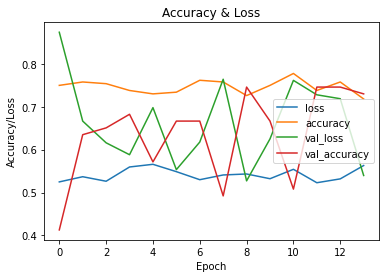

In [680]:
pd.DataFrame(history.history).plot();
plt.title('Accuracy & Loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.show()

In [681]:
model_0.evaluate(x_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.5326 - accuracy: 0.8101


[0.5326068997383118, 0.8101266026496887]